# Transfer learning과 Fine Tuning

<br/>
<br/>

## Transfer learning (전이 학습)

> 기존의 데이터를 통해 구현한 문제 해결 방식들을 연관성이 존재하는 다른 문제에 적용할 수 있도록 하는 머신러닝의 한 방법


남이 만든 모델 내가 쓸 수 있도록 바꾸겠다.

CNN은 데이터들 간의 공통적인 '특징'을 기억하고, 해당 특징을 통해서 분류하는 모델이라고 하였다.

일반적으로 모델이 클수록 학습하는데 필요한 데이터의 수도 증가한다. 또한 복잡한 문제일수록 더 큰 모델이 필요하다. 이에 따라 반드시 모델의 크기 상승은 필수적이게 된다.

주로, 해결해야하는 문제의 복잡도에 비해(모델의 크기에 비해) 데이터의 양이 충분하지 않은 경우 사용한다.



### 전이 학습의 과정

1. 기존의 유사한 문제를 해결하는 (현재 우리가 사용하는 데이터 셋과 유사한 데이터 셋을 학습시킨) 모델에서 Layer들을 들고온다.
 
    - 이 때, Layer는 Convolution Layer들을 의미한다. Convolution Layer들은 데이터들의 '특징'들을 기억하고 있다. 기존 데이터 셋의 '특징'들이 학습되어 있으므로 해당 Convolution Layer들을 들고와서 동일한 특징들을 검출해낼 수 있도록 한다.

2. 기존의 모델에서 들고온 Layer들에 대해 `trainable = False`로 설정하여 학습 과정에서 가중치 갱신이 발생하지 않도록 한다.

    - 기존의 '특징'을 검출하는 Layer의 연산이 학습과정에서 손실되지 않고 그대로 수행하기 위함이다.

3. 기존 모델의 Convolution Layer들을 통해 데이터의 '특징'들을 검출하는 과정만을 들고왔다. 해당 특징들을 통해서 (너구리이다/아니다.)와 같은 '분류'를 위한 예측을 수행해야하기 때문에 예측을 수행하는 새 레이어를 추가한다. 예측을 수행하는 레이어는 Fully connected layer로 구현한다.

    - 이전 과정에서 CNN을 구현할 때에도 Convolution Layer들의 수행 이후에 Fully connected layer로 최종 예측 결과를 반환하였다. 이와 마찬가지로, 다른 모델에서 Convolution Layer를 가져오고 + 우리가 만든 Fully connected layer => 최종 예측 결과를 반환한다.

4. 데이터 셋을 통해 Fully connected layer로 구성된 예측을 수행하는 레이어들을 학습시킵니다.

<br/>
<br/>
<br/>

## Fine Tuning

전이학습을 통해 우리가 추가한 fully connected layer 즉, 예측을 수행하는 레이어들이 충분히 학습되었을 때, 모델을 고도화하기 위해 파인튜닝을 사용합니다. 기존의 데이터를 통해 기억된 '특징'을 사용하기만 하는 것이 아니라, 현재 데이터의 '특징'들까지 기억할 수 있도록 모델을 우리의 문제에 대해서 고도화하는 작업입니다.

- 기존에 Convolution layer들에 대해서 trainable = True 를 통해 현재 데이터를 통한 가중치 갱신이 가능하도록 설정.

- 기존에 사용하였던 learning rate보다 훨씬 작은 learning rate를 사용합니다. Adam의 기본 값은 0.001입니다.이보다 훨씬 작은 값을 사용하여 기존의 가중치에서 매우 미세하게 조정합니다. 기존의 특징들을 그대로 사용하되, 현재 데이터의 특징을 반영하기 위해.


# 필요한 레이어 지식


## GlobalAveragePooling2D layer


```python

tf.keras.layers.GlobalAveragePooling2D(data_format=None, **kwargs)

```

---

채널별로 평균값을 사용하여 하나의 배열로 만드는 pooling과정

- 마지막 flatten()의 과정을 대신하여 fully-connected layer로 사용되기 위한 벡터화 과정을 해당 과정으로 대체한다.

<img src="./education_images/global_max_pooling.png" alt="Drawing" style="width: 700px;"/>

이미지의 크기 (255, 255, 3)에서 마지막 차원의 크기를 channel이라고 하였다. channel의 크기가 Convolution layer의 filter 갯수에 따라 결정됩니다. 

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications import ResNet50

In [3]:
test_model = ResNet50()

102973440/102967424 [==============================] - 5s 0us/step


In [4]:
test_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# BatchNormalization



```python

tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None,
    **kwargs
)

```

---


### layer의 input을 정규화하는 과정.  


1. input이 동일한 분포를 가지지 못하는 이유는 학습 과정에서 가중치가 변경되고 변경된 가중치에 의해 입력의 분포가 바뀌게 되기 때문이다.
2. 단순히 input에 대한 정규화를 입력 전에 수행한다고 한다면 일단 정규화라는 연산이 매우 높은 cost를 가진 연산이다.
3. 또한 학습과정과 무관하게 진행되기 때문에 우리의 의도와는 다르게 학습이 진행될 수 있다. (특정 파라미터가 계속 커진다거나..)

그래서 이 과정을 batch마다 수행하며, 학습되는 과정과 동일하게 정규화하는 변수들도 학습하게 하여 정규화되는 것 또한 학습 과정에 맞도록 설계

- 위치는 activation function의 이전에 사용하는 것이 효율적이라는 것이 해당 논문에 나온다.


Convolution layer - activation function의 중간과정에 BatchNormalization layer를 추가하는 것이 오버피팅을 방지함으로써 정확도를 높이는데 도움이 된다.


# VGG 16, VGG 19


```python

tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

```

#### include_top

모델의 최상위 fully connected layer를 포함시킬 것인가에 대해 정의한다.

- 입력에서부터 출력까지 최하위 - 최상위 layer라고 합니다.

- convolution layer들은 가져오고, 나머지 fully connected layer들을 가져오지 않기 위해 해당 인자를 사용하여 최상위 layer인 fully connected layer를 제하고 모델을 생성합니다.


#### weights

기존의 학습된 가중치 값을 가져올 것인가에 대한 정의

- 'None'

    해당 모델의 구조만 사용하기 위해서 랜덤값으로 초기화하여 생성
    

- 'imagenet'

    ImageNet 데이터를 사전에 학습시켜둔 가중치를 로드하여 생성


#### input_shape


입력 이미지들의 shape를 정의할 수 있다. (최소 크기의 shape가 존재하므로 주의) 예를 들어 input_shape = (160, 320, 3)

- 기본적으로 (224, 224, 3)의 값을 가집니다.
- include_top = False일때만 사용이 가능합니다. (fully-connected layer를 가져오지 않겠다는 뜻)
    

#### input_tensor


Functional API를 통해서 모델을 구현할 때 `tf.keras.layer.Input(input_shape = (160, 320, 3))`  input tensor를 정의하였다. 해당 텐서를 사용하여 레이어의 입력으로 정의하기 위해서 사용합니다.

- include_top = False일때만 사용이 가능합니다. (fully-connected layer를 가져오지 않겠다는 뜻)


#### pooling

include_top = False일 때, 생성한 모델의 최종 layer인 global pooling layer을 어떠한 방식의 연산으로 사용할 것인가

- include_top = False일때만 사용이 가능합니다. (fully-connected layer를 가져오지 않겠다는 뜻)

- 'avg'

- 'max'


#### classes

- weights = 'imagenet'으로 사용하게되면 기본적으로 1000개의 카테고리를 구분하는 모델 생성됩니다. 그러므로 해당인자는 사용을 할 수 없습니다. weights = 'None'일 경우에는 기존 모델의 구조만 사용하는 것이기 때문에 classes 인자를 통해 최종 분류할 카테고리의 수를 정의합니다.


---

   

## ImageNet

ImageNet은 1000개의 카테고리로 구성된 사물들을 구분할 수 있도록 1400만개 이상의 라벨링된 이미지 데이터셋을 말한다. 

매년 해당 데이터 셋을 학습시켜 정확도를 높이는 대회가 개최되는데, 대회에서 높은 순위의 모델을 미리 케라스에서 구현하여 제공한다.

- VGG16 / VGG19

 
- ResNet50 / ResNet101 / ResNet152

 

# 전이학습을 진행할 모델 준비하기

In [5]:
from tensorflow.keras.applications import VGG16

In [19]:
test_model_2  = VGG16(
    include_top = False,
    pooling = 'max',
    # 최소 input shape보다는 커야합니다.
    input_shape = (32, 32, 3)
)

In [20]:
test_model_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [10]:
test_model_3  = VGG16()

In [11]:
test_model_3.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# ResNet50, ResNet101

```python

tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
)


tf.keras.applications.ResNet101(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
)

```

위의 인자설명과 동일합니다.

In [2]:
from tensorflow.keras.applications  import ResNet50

In [3]:
test_model_2  = ResNet50(
    include_top = False,
    pooling = 'max',
    # 최소 input shape보다는 커야합니다.
    input_shape = (32, 32, 3)
)

94773248/94765736 [==============================] - 5s 0us/step


In [4]:
test_model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
import tensorflow as tf

# 데이터 준비하기

In [7]:
# 데이터셋 구현을 위해서 tf.keras.preprocessing.image_dataset_from_directory()
# 개, 고양이 데이터셋 사용
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets',
    label_mode = 'binary',
    batch_size = 50
)

Found 23422 files belonging to 2 classes.


In [30]:
# 학습 데이터와 평가 데이터가 필요하다.  validation split을 통해 학습 데이터와 검증 데이터를 구분하는 방식으로 평가 데이터를 분할한다.

train_dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets',
    label_mode = 'binary',
    batch_size = 50,
    seed = 3330,
    validation_split = 0.2,
    image_size = (150, 150),
    subset = 'training'
)

test_dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/pets',
    label_mode = 'binary',
    batch_size = 50,
    seed = 3330,
    validation_split = 0.2,
    image_size = (150, 150),
    subset = 'validation'
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [31]:
train_dataset

<BatchDataset shapes: ((None, 150, 150, 3), (None, 1)), types: (tf.float32, tf.float32)>

### 데이터셋 시각화

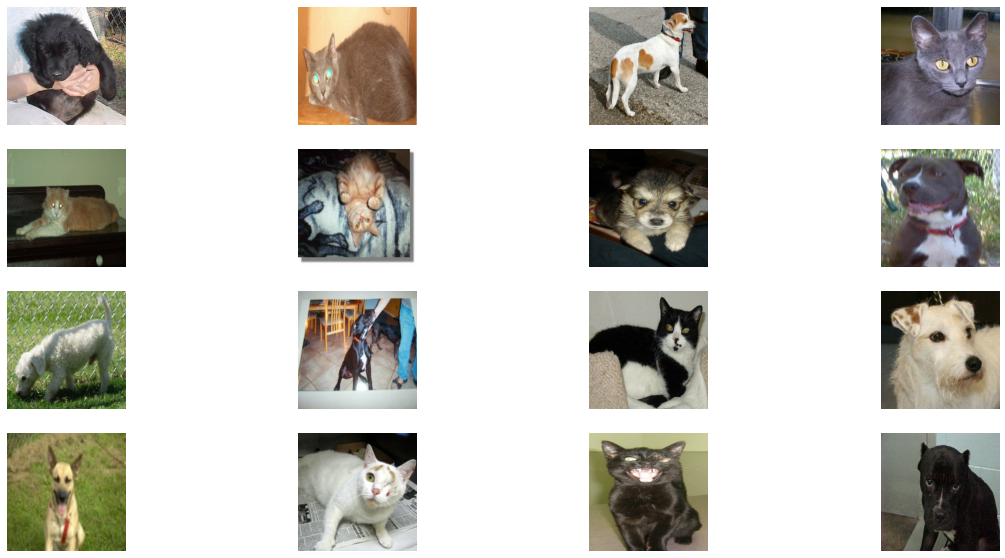

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize= (20, 10))

# 9개의 batch를 dataset에서 뽑고, for loop를 통해 해당 batch의 이미지, 라벨을 메모리로 로드한다.
for images, labels in train_dataset.take(9):
    
    # 이미지가 여러장이기 때문에
    for i, image in enumerate(images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image / 255.)
        plt.axis('OFF')
        if i == 15:
            break
    break
    

# Data augmentation 사용하기 - 1 레이어로 정의하기

In [11]:
Augmentation_Layer = tf.keras.Sequential([
    #랜덤하게 수평으로 뒤집는 이미지 처리 
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    # 랜덤하게 해당 이미지를 회전시키는 이미지 처리
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    # 원하는 레이어를  tf.keras.layers.experimental.preprocessing 모듈에서 추가함으로서 data augmentation을 구현할 수 있다.
])

### Data augmentation을 수행한 데이터셋 시각화

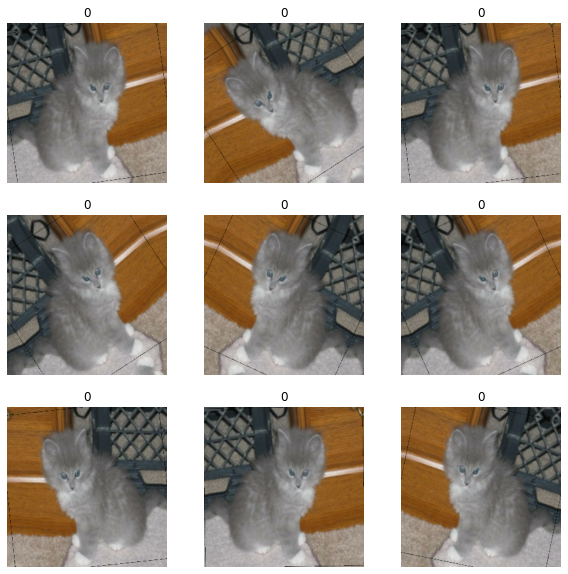

In [13]:
import numpy as np

global first_image

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = Augmentation_Layer(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy() / 255.)
        plt.title(int(labels[0]))
        plt.axis("off")

# Data augmentation 사용하기 - 2 ImageDataGenerator로 정의하기

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [20]:
# ImageDataGenerator 생성

datagen = ImageDataGenerator(
    rotation_range = 36,
    horizontal_flip= True,
    validation_split = 0.2,
)

## Data Augmentation 적용한 데이터셋 시각화

In [16]:
# 테스트할 이미지를 구축한다.
img = load_img('./dataset/pets/Cat/10445.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)

In [18]:
# 이전 방법으로 사용하였던 이미지
tests = np.expand_dims(first_image.numpy(), 0)

<class 'numpy.ndarray'>


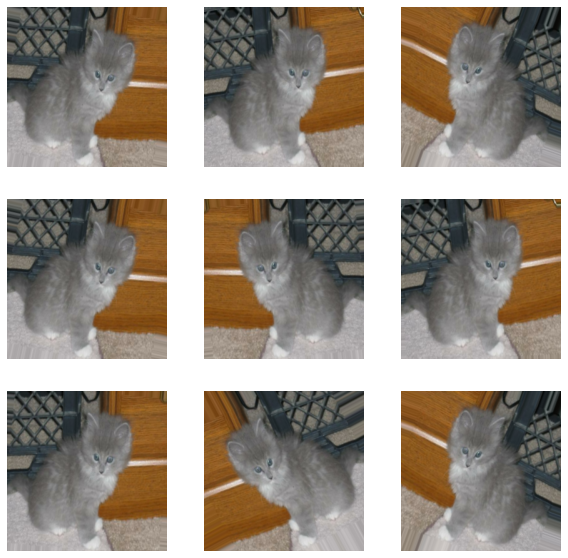

In [19]:
it = datagen.flow(tests, batch_size = 1)

# nd.array로 사용할 수 있게 된다.
batch = it.next()
print(type(batch))


fig = plt.figure(figsize = (10, 10))

for i in range(9):
        #들어오는 그래프를 서브플롯중 어디에 위치하게할 것인가를 결정
        plt.subplot(3,3, i + 1)

        # nd.array로 사용할 수 있게 된다.
        batch = it.next()

        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.axis("off")

## flow_from_directory

- label_mode -> class_mode

- image_size -> target_size

- validation_split -> ImageDataGenerator에 정의한다.

In [53]:
# ImageDataGenerator와 로컬 디렉토리를 연결

train_gen_dataset = datagen.flow_from_directory(
    './dataset/pets',
    class_mode = 'binary',
    batch_size = 50,
    target_size = (150, 150),
    seed = 3330,
    subset = 'training'
)


test_gen_dataset = datagen.flow_from_directory(
    './dataset/pets',
    class_mode = 'binary',
    batch_size = 50,
    target_size = (150, 150),
    seed = 3330,
    subset = 'validation'
)

Found 18739 images belonging to 2 classes.
Found 4683 images belonging to 2 classes.


# 모델 구현하기

In [24]:
from tensorflow.keras.applications import VGG16 

In [32]:
# convolution layer를 들고올 base model
# VGG16 모델을 사용하여 전이학습을 구현
base_model = VGG16(
    # fully connected layer를 사용하지 않겠다.
    include_top = False,
    input_shape = (150, 150, 3),
    # global pooling 적용
    pooling = 'avg'
)

In [33]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [35]:
# base model의 trainable = False, 해당 convolution layer를 학습과정에서 변하지 않도록 고정시킵니다.
base_model.trainable = False

In [36]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [37]:
# 특징들을 통해서 예측값을 반환하기 위해 fully connected layer를 추가합니다.

from tensorflow.keras.layers import Dense, ReLU, BatchNormalization

In [55]:
# 모델은 functional API로 구현

# dataset을 정의할 때, 이미지의 size를 (150 ,150, 3)으로 정의하였으므로
inputs = tf.keras.Input(shape = (150, 150, 3))

# convolution layer
# training = False, 내부의 레이어들에게 가중치 갱신이 진행되지 않는다는 것을 명시
x = base_model(inputs, training = False)

# fully connected layer
x = Dense(32)(x)

# fully connected layer - activation function사이에 추가
x = BatchNormalization()(x)
x = ReLU()(x)

# 개-고양이라는 이진분류이기 때문에
outputs = Dense(1, activation = 'sigmoid')(x)

# 전이학습 모델 구현
func_model = tf.keras.Model(inputs, outputs)

In [48]:
func_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_8 (Dense)              (None, 32)                16416     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 14,731,265
Trainable params: 16,513
Non-trainable params: 14,714,752
_____________________________________

# 레이어로 구현한 Data Augmentation 적용

In [43]:
# 모델은 functional API로 구현

inputs = tf.keras.Input(shape = (150, 150, 3))
# data augmentaion layer를 추가 
x = Augmentation_Layer(inputs)

x = base_model(x, training = False)
x = Dense(32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
outputs = Dense(1, activation = 'sigmoid')(x)
func_model = tf.keras.Model(inputs, outputs)

In [44]:
func_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

# 모델 학습하기

In [49]:
func_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_8 (Dense)              (None, 32)                16416     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 14,731,265
Trainable params: 16,513
Non-trainable params: 14,714,752
_____________________________________

In [58]:
func_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
# 학습 진행

In [54]:
func_model.fit(train_gen_dataset, epochs = 5)

Epoch 1/5
375/375 [==============================] - 702s 2s/step - loss: 0.2270 - accuracy: 0.9048
Epoch 2/5
375/375 [==============================] - 708s 2s/step - loss: 0.1720 - accuracy: 0.9279
Epoch 3/5
375/375 [==============================] - 707s 2s/step - loss: 0.1606 - accuracy: 0.9337
Epoch 4/5
375/375 [==============================] - 718s 2s/step - loss: 0.1578 - accuracy: 0.9355
Epoch 5/5
375/375 [==============================] - 712s 2s/step - loss: 0.1499 - accuracy: 0.9378


In [59]:
# 학습된 모델 평가
func_model.evaluate(test_gen_dataset)

94/94 [==============================] - 159s 2s/step - loss: 3.6917 - accuracy: 0.5704


[3.6917195320129395, 0.5703608989715576]

# fine tuning 하기

In [60]:
# 위의 전이학습을 통해 학습이 진행된 func_model을 파인튜닝하기.

# convolution layer들의 가중치 갱신이 가능하도록 설정.
base_model.trainable = True

1e-5 = 0.00005

In [61]:
# learning rate를 매우 작게 설정
func_model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-5),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [62]:
func_model.fit(train_gen_dataset, epochs = 5)

Epoch 1/5
175/375 [=============>................] - ETA: 24:28 - loss: 0.3495 - accuracy: 0.8472

KeyboardInterrupt: 

In [ ]:
#
func_model.evaluate(test_gen_dataset)